## Demandes de valeur foncière - Sélection des transactions uniques

Une transaction unique correspond aux identifiants de mutation (champ `id_mutation`) qui n'impliquent qu'un seul bien. Pour ces transactions, chaque valeur foncière est associée à un seul bien.

### Setup 

In [46]:
import sys
sys.path.append("../")

In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
from lib.preprocessing import dvf, geo
from lib.utils import get_unique_entries, add_date_components
from lib.enums import CITIES

In [4]:
import pandas as pd 

import numpy as np 

from rich import print 
from rich.console import Console
from rich.table import Table

import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
pd.set_option("display.max_columns", None)

In [6]:
DATA_DIR = "../data/"

ZIP_DIR = f"{DATA_DIR}dvf.zip"

GEOGRAPHY_DIR = f"{DATA_DIR}geography/"
DENSITY_DIR = f"{DATA_DIR}densite/"

YEAR = 2019

### Chargement des données

In [7]:
df = dvf.load_zip_csv(zip_dir=ZIP_DIR, year=YEAR)

In [8]:
df.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2019-1,2019-01-04,1,Vente,37220.0,26.0,NaN,RUE DE MONTHOLON,2730,1000.0,1053,Bourg-en-Bresse,1,NaN,NaN,01053000AI0298,NaN,NaN,8.0,19.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,20.0,1.0,NaN,NaN,NaN,NaN,NaN,5.209562,46.198840
1,2019-2,2019-01-04,1,Vente,185100.0,22.0,B,RUE GEN DELESTRAINT,1650,1000.0,1053,Bourg-en-Bresse,1,NaN,NaN,01053000AM0095,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,5.219396,46.198766
2,2019-2,2019-01-04,1,Vente,185100.0,22.0,NaN,RUE GEN DELESTRAINT,1650,1000.0,1053,Bourg-en-Bresse,1,NaN,NaN,01053000AM0095,NaN,NaN,137.0,NaN,154.0,61.51,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,62.0,3.0,NaN,NaN,NaN,NaN,NaN,5.219396,46.198766
3,2019-3,2019-01-08,1,Vente,209000.0,3.0,NaN,RUE DES CHAMPAGNES,0043,1160.0,1314,Priay,1,NaN,NaN,013140000E1676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,90.0,4.0,S,sols,NaN,NaN,940.0,5.282104,45.999566
4,2019-4,2019-01-07,1,Vente,134900.0,5.0,NaN,LOT LE BIOLAY,A003,1370.0,1350,Saint-Étienne-du-Bois,1,NaN,NaN,01350000AA0011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,101.0,5.0,S,sols,NaN,NaN,490.0,5.299929,46.293278


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3623957 entries, 0 to 3623956
Data columns (total 40 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   id_mutation                   object 
 1   date_mutation                 object 
 2   numero_disposition            int64  
 3   nature_mutation               object 
 4   valeur_fonciere               float64
 5   adresse_numero                float64
 6   adresse_suffixe               object 
 7   adresse_nom_voie              object 
 8   adresse_code_voie             object 
 9   code_postal                   float64
 10  code_commune                  object 
 11  nom_commune                   object 
 12  code_departement              object 
 13  ancien_code_commune           float64
 14  ancien_nom_commune            object 
 15  id_parcelle                   object 
 16  ancien_id_parcelle            object 
 17  numero_volume                 object 
 18  lot1_numero           

In [10]:
df.shape

(3623957, 40)

### Preprocessing

#### Sélection des ventes

In [11]:
df_sales = dvf.select_sales(df) 

In [12]:
df_sales.nature_mutation.unique()

array(['Vente'], dtype=object)

In [13]:
df_sales.shape

(3287308, 40)

In [14]:
# remove dataframe to save memory space
del df

#### Type de biens

In [15]:
pd.crosstab(
    df_sales["type_local"], 
    df_sales["code_type_local"], 
    margins=True
) 

code_type_local,1.0,2.0,3.0,4.0,All
type_local,,,,,
Appartement,0,606760,0,0,606760
Dépendance,0,0,439431,0,439431
Local industriel. commercial ou assimilé,0,0,0,134613,134613
Maison,706649,0,0,0,706649
All,706649,606760,439431,134613,1887453


In [16]:
df_sales.loc[df_sales.type_local.isna(), "code_type_local"].value_counts(dropna=False)

NaN    1399855
Name: code_type_local, dtype: int64

In [17]:
df_sales["code_type_local"].value_counts(dropna=False) / df_sales.shape[0]

NaN    0.425836
1.0    0.214963
2.0    0.184577
3.0    0.133675
4.0    0.040949
Name: code_type_local, dtype: float64

In [18]:
df_sales["type_local"] = df_sales["code_type_local"].apply(dvf.encode_property_type)

In [19]:
df_sales.type_local.value_counts(dropna=False) / df_sales.shape[0]

NaN                                         0.425836
Maison                                      0.214963
Appartement                                 0.184577
Dépendance                                  0.133675
Local industriel. commercial ou assimilé    0.040949
Name: type_local, dtype: float64

On  remarque une proportion significative de biens pour lesquels la variable `type_local` n'est pas renseignée. 

#### Sélection des appartements/maisons/dépendances

In [20]:
df_sales = dvf.remove_industrial_facilities(df_sales)

In [21]:
df_sales.shape

(1752840, 40)

## Extraction des transactions uniques

La méthode consiste à grouper le jeu de données par `id_mutation`, compter le nombre d'entrées par id et sélectionner uniquement les id tq le nombre d'entrées vaut 1. 

Avant cela, on sépare les maisons/appartements des dépendances pour ajouter plus tard une variable indiquant si le bien possède une dépendance. L'intérêt de ne pas séparer maisons et appartements est de supprimer les identifiants de mutation associées à une maison et un appartement. 

In [22]:
# split dataset into houses/flats and dependencies

dict_sales = {
    "houses_flats": df_sales.loc[df_sales.code_type_local != 3], 
    "dependencies": df_sales.loc[df_sales.code_type_local == 3]
}

In [23]:
unique_ids = get_unique_entries(dict_sales["houses_flats"], "id_mutation")

In [24]:
n_unique_ids = len(unique_ids)
n_ids = dict_sales["houses_flats"].id_mutation.unique().shape[0]
prop = 100 * n_unique_ids / n_ids 

print(f"{round(prop, 2)}% d'identifiants de mutation associées à un seul bien pour les maisons & appartements")

84.71% d'identifiants de mutation associées à un seul bien pour les maisons & appartements

In [25]:
dict_sales = {
    k: df.loc[df.id_mutation.isin(unique_ids), :]
    for k, df in dict_sales.items()
}

Maintenant que les transactions uniques ont été identifées, on sépare les maisons des appartements. 

In [26]:
dict_sales["houses"] = dict_sales["houses_flats"]\
    .loc[dict_sales["houses_flats"].code_type_local==1, :]

dict_sales["flats"] = dict_sales["houses_flats"]\
    .loc[dict_sales["houses_flats"].code_type_local==2, :]

del dict_sales["houses_flats"]

In [27]:
dict_sales.keys()

dict_keys(['dependencies', 'houses', 'flats'])

### Ajout de variables

#### Dummy `dependance`

Variable indicatrice qui vaut 1 si le bien possède au moins une dépendance, 0 sinon. 

In [28]:
dependencies = dict_sales["dependencies"]
del dict_sales["dependencies"]

dict_sales = {
    property_type: dvf.add_dependency_dummy(df, dependencies)
    for property_type, df in dict_sales.items()
}

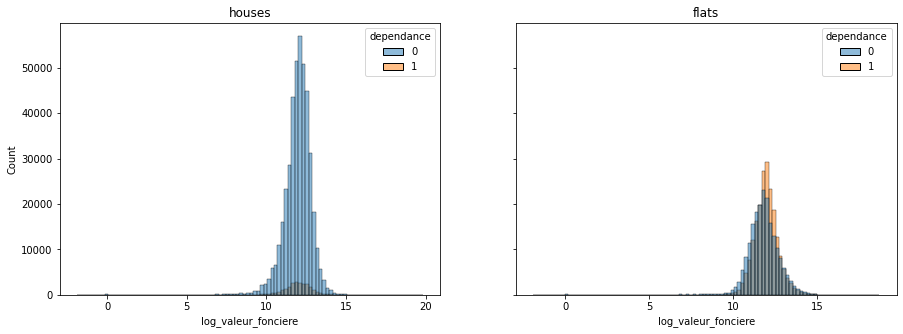

In [29]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5), sharey=True)

for (property_type, df), ax in zip(dict_sales.items(), axes.flatten()): 
    tmp = df.copy()
    tmp["log_valeur_fonciere"] = np.log(tmp.valeur_fonciere)
    sns.histplot(data=tmp, x="log_valeur_fonciere", hue="dependance", bins=100, ax=ax)
    ax.set_title(property_type)

del tmp 

#### Variables géographiques

**Régions**

In [30]:
# convert department id to character

for property_type, df in dict_sales.items(): 
    df["code_departement"] = df["code_departement"].astype(str)
    dict_sales[property_type] = df

del df 

In [31]:
regions_dpts = pd.read_csv(f"{GEOGRAPHY_DIR}regions_departments.csv")
regions_dpts

,code_region,code_departement,nom_departement,nom_region
0,84,1,Ain,Auvergne-Rhône-Alpes
1,84,3,Allier,Auvergne-Rhône-Alpes
2,84,7,Ardèche,Auvergne-Rhône-Alpes
3,84,15,Cantal,Auvergne-Rhône-Alpes
4,84,26,Drôme,Auvergne-Rhône-Alpes
...,...,...,...,...
104,COM,984,Terres australes et antarctiques françaises,Collectivités d'Outre-Mer
105,COM,986,Wallis et Futuna,Collectivités d'Outre-Mer
106,COM,987,Polynésie française,Collectivités d'Outre-Mer
107,COM,988,Nouvelle-Calédonie,Collectivités d'Outre-Mer


In [32]:
dict_sales = {
    property_type: pd.merge(left=df, right=regions_dpts, how="left", on="code_departement")
    for property_type, df in dict_sales.items()
} 

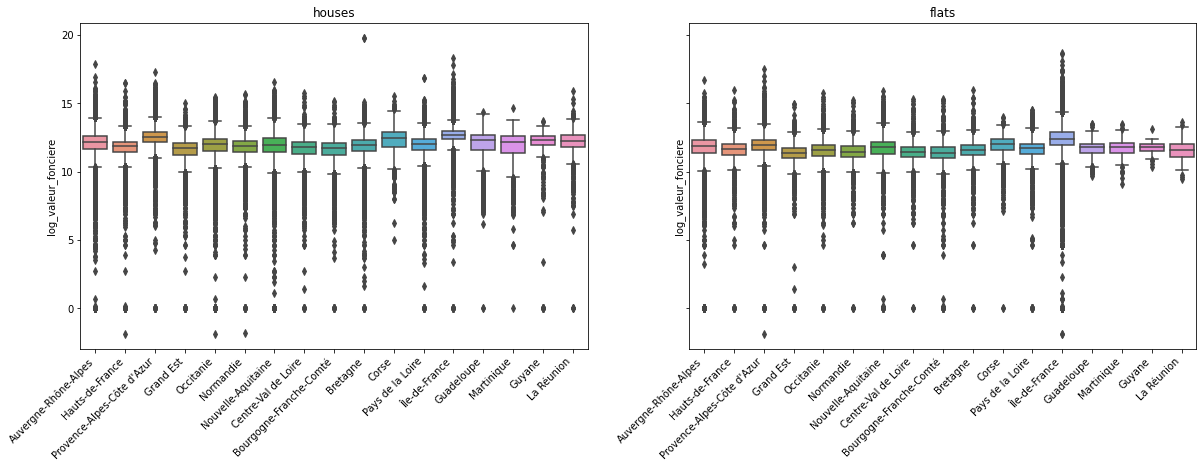

In [33]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 6), sharey=True)

for (property_type, df), ax in zip(dict_sales.items(), axes.flatten()): 
    tmp = df.copy()
    tmp["log_valeur_fonciere"] = np.log(tmp.valeur_fonciere)
    
    sns.boxplot(data=tmp, x="nom_region", y="log_valeur_fonciere", ax=ax)
    ax.set_title(property_type)
    ax.set_xlabel("")
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha="right")

del tmp

**Grille communale de densité**

On récupère une grille communale de densité depuis le [site](https://www.insee.fr/fr/information/6439600) de l"Insee. Cette grille comprend le code de la commune, son nombre d"habitants (2019) et une variable `degre_densite` à 7 niveaux : 

1. "Rural à habitat dispersé"
2. "Centres urbains intermédiaires"
3. "Bourgs ruraux"       
4. "Ceintures urbaines"            
5. "Rural à habitat très dispersé"
6. "Petites villes"                
7. "Grands centres urbains"

On décide d"y ajouter le nombre d"habitants pour les arrondissements de Paris, Marseille et Lyon. Pour ces 3 villes, la variable `degre_densite` vaut respectivement "Paris", "Marseille" et "Lyon". 

In [34]:
density = pd.read_csv(f"{DENSITY_DIR}municipality_density_levels.csv")
density

,code_commune,degre_densite,pop
0,1001,Rural à habitat dispersé,779
1,1002,Rural à habitat dispersé,256
2,1004,Centres urbains intermédiaires,14134
3,1005,Bourgs ruraux,1751
4,1006,Rural à habitat dispersé,112
...,...,...,...
34995,69385,Lyon,49546
34996,69386,Lyon,52621
34997,69387,Lyon,84310
34998,69388,Lyon,85980


In [35]:
# convert code_commune to character

for property_type, df in dict_sales.items(): 
    df["code_commune"] = df["code_commune"].astype(str)
    dict_sales[property_type] = df

del df 

In [36]:
dict_sales = {
    property_type: pd.merge(left=df, right=density, how="left", on="code_commune")
    for property_type, df in dict_sales.items()
}

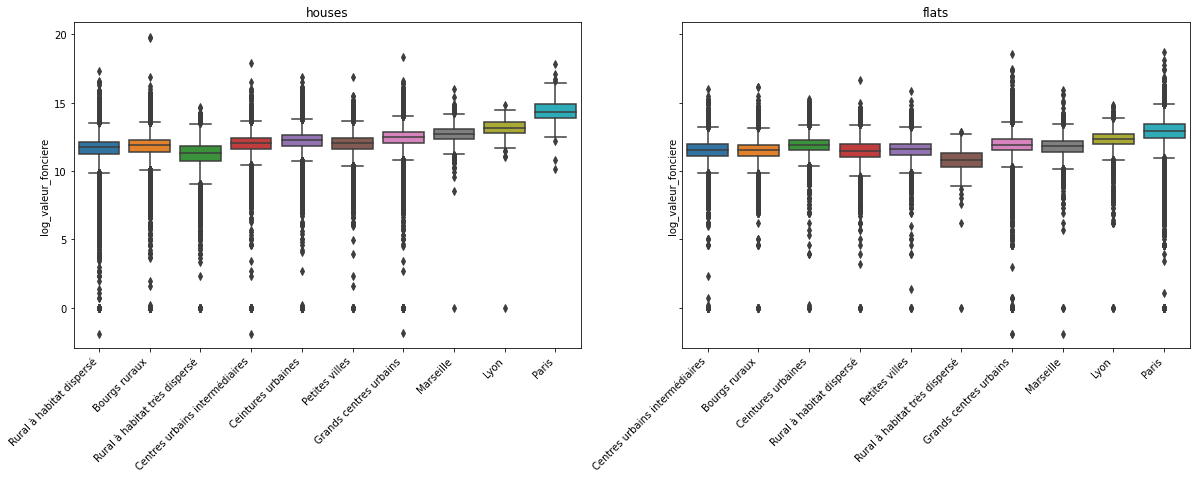

In [37]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 6), sharey=True)

for (property_type, df), ax in zip(dict_sales.items(), axes.flatten()): 
    tmp = df.copy()
    tmp["log_valeur_fonciere"] = np.log(tmp.valeur_fonciere)
    
    sns.boxplot(data=tmp, x="degre_densite", y="log_valeur_fonciere", ax=ax)
    ax.set_title(property_type)
    ax.set_xlabel("")
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha="right")

del tmp

#### Variable temporelles

In [38]:
dict_sales = {
    property_type: add_date_components(df, date_var="date_mutation") 
    for property_type, df in dict_sales.items()
}

In [39]:
for property_type, df in dict_sales.items(): 
    n = df.id_mutation.unique().shape[0] 
    assert n == df.shape[0]
    print(f"{n} unique {property_type}")

448458 unique houses

400796 unique flats

## Séparation par zone géographique

On choisit de paritionner le jeu de données selon la zone géographique de la manière suivante :

- Paris
- Marseille
- Lyon
- Toulouse 
- Nice
- Nantes
- Montpellier
- Strasbourg
- Bordeaux
- Lille
- Urbain : `degre_densite` $\in$ $\{$'Grands centres urbains', 'Centres urbains intermédiaires', 'Ceintures urbaines'$\}$
- Rural : `degre_densite` $\in$ $\{$'Petites villes', 'Bourgs ruraux', 'Rural à habitat dispersé', 'Rural à habitat très dispersé'$\}$

In [40]:
dict_sales_splitted = {

    property_type: {
        "cities": geo.split_by_city(df), 
        "urban_areas": geo.get_urban_areas(df), 
        "rural_areas": geo.get_rural_areas(df)
    } 

    for property_type, df in dict_sales.items()
    
}

In [41]:
# check coherence of transactions number per property type

for property_type, dfs_splitted in dict_sales_splitted.items(): 

    n1 = dict_sales[property_type].shape[0] 
    n1 -= dict_sales[property_type]\
        .degre_densite\
        .isna()\
        .sum()
        
    n2 = 0    
    for key, dfs in dfs_splitted.items(): 
        if key == "cities": 
            n2 += sum(df.shape[0] for df in dfs.values()) 
        else:
            n2 += dfs.shape[0] 
    
    assert n1 == n2

In [42]:
table = Table()

table.add_column("Zone géographique")
table.add_column("Maisons")
table.add_column("Appartements")

n_houses_tot, n_flats_tot = 0, 0

for city in CITIES:         
    n_houses = dict_sales_splitted["houses"]["cities"][city].shape[0]
    n_flats = dict_sales_splitted["flats"]["cities"][city].shape[0]
    table.add_row(city, f"{n_houses:,}", f"{n_flats:,}")

    n_houses_tot += n_houses
    n_flats_tot += n_flats 

for area in ("urban_areas", "rural_areas"): 
    n_houses = dict_sales_splitted["houses"][area].shape[0]
    n_flats = dict_sales_splitted["flats"][area].shape[0]
    table.add_row(area, f"{n_houses:,}", f"{n_flats:,}")

    n_houses_tot += n_houses
    n_flats_tot += n_flats 

table.add_row("Total", f"{n_houses_tot:,}", f"{n_flats_tot:,}")

console = Console()
console.print(table)

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Zone géographique ┃ Maisons ┃ Appartements ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ Paris             │ 174     │ 33,846       │
│ Marseille         │ 1,728   │ 11,557       │
│ Lyon              │ 203     │ 8,027        │
│ Toulouse          │ 1,338   │ 7,783        │
│ Nice              │ 254     │ 8,136        │
│ Nantes            │ 1,376   │ 4,942        │
│ Montpellier       │ 587     │ 4,846        │
│ Bordeaux          │ 1,242   │ 3,600        │
│ Lille             │ 1,227   │ 3,201        │
│ Rennes            │ 569     │ 3,441        │
│ urban_areas       │ 196,195 │ 260,782      │
│ rural_areas       │ 243,391 │ 50,342       │
│ Total             │ 448,284 │ 400,503      │
└───────────────────┴─────────┴──────────────┘

## Sauvegarde

In [44]:
import pickle as pkl 
import os

In [45]:
file_path = f"{DATA_DIR}cleaned/dvf_splitted_{YEAR}"

with open(file_path, "wb") as file: 
    pkl.dump(dict_sales_splitted, file)

print(f"File sucessefully saved at {file_path}.")

File sucessefully saved at ../data/cleaned/dvf_splitted_2019.